# Life Expectancy and GDP Project
## Purpose
The goal of this project is to analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try to identify the relationship between the GDP and life expectancy of six countries.

This project will seek to answer the following questions:
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

This project was completed as part of the Codecademy Data Science Career Path Certificate program. 

## Import Libraries
Pandas, pyplot, and seaborn are imported to support data manipulation and vizualisation.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load the Data
The data provided for the project was saved to a csv file named **all_data.csv**. The following code reads the data and saves it to a dataframe.

In [2]:
df = pd.read_csv('all_data.csv')
df.sample(10)

,Country,Year,Life expectancy at birth (years),GDP
68,United States of America,2004,77.5,1.230000e+13
51,Mexico,2003,75.0,7.132840e+11
34,Germany,2002,78.4,2.079140e+12
62,Mexico,2014,76.6,1.298460e+12
72,United States of America,2008,78.2,1.470000e+13
20,China,2004,73.5,1.955350e+12
44,Germany,2012,80.6,3.543980e+12
38,Germany,2006,79.6,3.002450e+12
10,Chile,2010,79.1,2.185380e+11
12,Chile,2012,79.9,2.671220e+11


## Exploring the Data
The unique values present in the year column show that the data ranges from 2000-2015. 

In [3]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The unique values present in the country column show that data is provided for Chile, China, Germany, Mexico, the United States of America, and Zimbabwe.

In [4]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


**Data Clean-Up**<br>
'Life expectancy at birth (years)' is not a convenient name for a column. The code below renames the column as 'LE' for life expectancy.

In [5]:
df.rename(columns = {'Life expectancy at birth (years)' : 'LE'}, inplace=True)
print(df.columns)

Index(['Country', 'Year', 'LE', 'GDP'], dtype='object')


'United States of America' is a long country name. The code below renames all values of 'United States of America' to 'United States'.

In [6]:
df['Country'].replace({'United States of America': 'United States'}, inplace=True)
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States' 'Zimbabwe']


GDP is reported in US dollars (USD). To make the numbers easy to read, the code below divides GDP values by 1 trillion to express GDP in trillion USD. The GDP of the United States is 18.1 trillion USD.

In [7]:
df['GDP'] = df.GDP/1000000000000
print(df[(df.Country == 'United States') & (df.Year == 2015)])

          Country  Year    LE   GDP
79  United States  2015  79.3  18.1


## Change in Life Expectancy
The line chart below shows the change in life expectancy of all six countries from 2000-2015.<br>
<br>
All countries showed an increase in life expectancy over the 15 year reporting period.<br>
The life expectancy in Zimbabwe shows the steepest increase, yet in 2015 it is still far below the other 5 counties.

Text(0.5, 1.0, 'Life Expectancy')

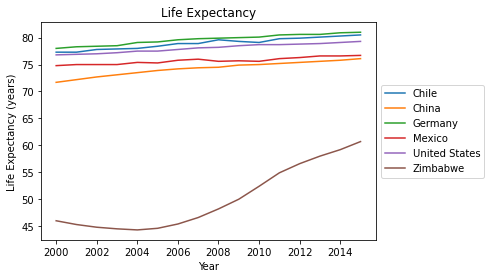

In [8]:
sns.lineplot(data=df, x='Year', y='LE', hue='Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy')

## Change in GDP
The line chart below shows the change in GDP of all six countries from 2000-2015.<br>
<br>
The United States and China showed the steepest increase over the 15 year reporting period. Germany shows a slight increase, but this plot does not clearly show if there was an increase in GDP for Chile, Mexico and Zimbabwe. <br>

Text(0.5, 1.0, 'Gross Domestic Product')

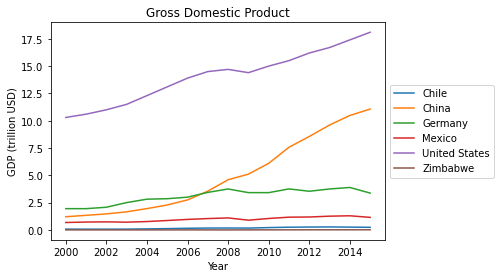

In [9]:
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP (trillion USD)')
plt.title('Gross Domestic Product')

## Correlation between GDP and Life Expectancy
The line charts below show the change in GDP and life expectancy over 15 years for each individual country. <br>

Using this plot, it can be verified that GDP and life expectancy increased for all six countries from 2000-2015.<br>
Generally, the charts indicate an increase in life expectancy with an increase in GDP.

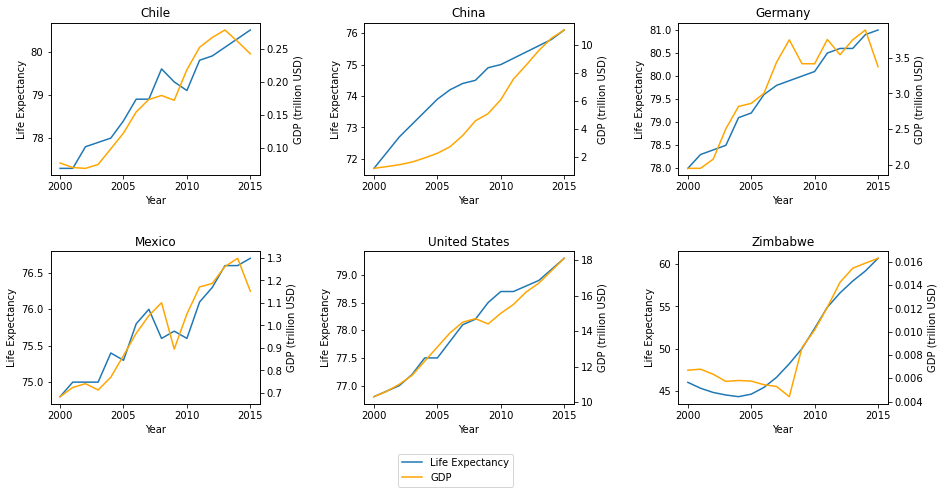

In [10]:
countries = df.Country.unique()

fig = plt.figure(figsize=(15, 7))
n = 1

for country in countries:
    ax1 = plt.subplot(2, 3, n)
    ax1.plot(df[df.Country == country].Year, df[df.Country == country].LE)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Life Expectancy')
    ax2 = ax1.twinx() #Instantiate new y axes on same x axis as ax1
    ax2.set_ylabel('GDP (trillion USD)')
    ax2.plot(df[df.Country == country].Year, df[df.Country == country].GDP, color='orange')
    plt.title(country)
    n+=1

fig.legend(['Life Expectancy', 'GDP'], loc='lower center', bbox_to_anchor=(0.5, -0.05))

plt.subplots_adjust(wspace=.5, hspace=.5)

The scatter plots below show the correlation between GDP and life expectancy for each of the six countries.

A positive correlation is shown for all six countries.

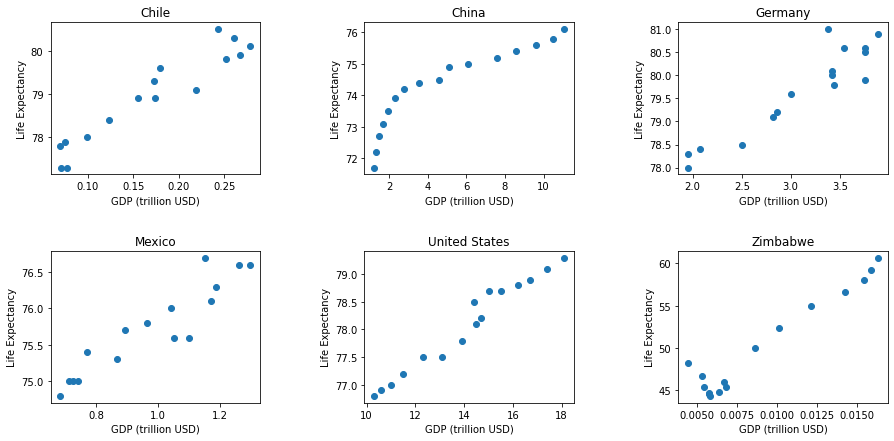

In [11]:
fig = plt.figure(figsize=(15, 7))
n = 1

for country in countries:
    ax1 = plt.subplot(2, 3, n)
    ax1.scatter(df[df.Country == country].GDP, df[df.Country == country].LE)
    ax1.set_xlabel('GDP (trillion USD)')
    ax1.set_ylabel('Life Expectancy')
    plt.title(country)
    n+=1

plt.subplots_adjust(wspace=.5, hspace=.5)

## Average Life Expectancy
The bar chart below shows the average life expectancy for each country, based on the 15 years of data provided.

Text(0.5, 1.0, 'Average Life Expectancy')

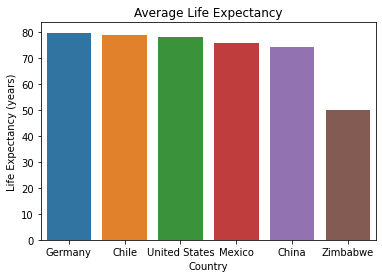

In [12]:
sns.barplot(data=df.sort_values('LE', ascending=False), x='Country', y='LE', ci=False)
plt.ylabel('Life Expectancy (years)')
plt.title('Average Life Expectancy')

## Life Expectancy Distribution
The violin chart below shows the distribution of life expectancy for each country.

Most of the countries shows a left skewed distribution.

Zimbabwe shows to have the widest distribution over the 15 years of data. This plot does not clearly show the distribtuion of Zimbabwe life expectancy. An individual plot below indicates a right skewed distribution.

Text(0.5, 1.0, 'Life Expectancy Distribution')

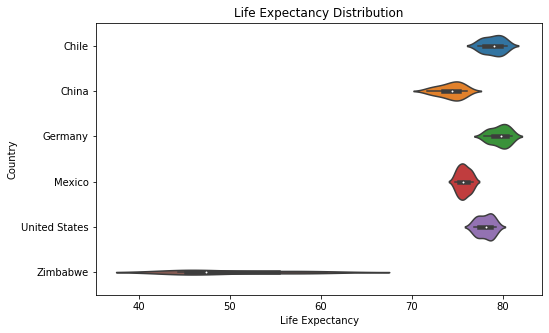

In [13]:
fig = plt.figure(figsize = (8, 5))
sns.violinplot(data=df, x='LE', y='Country')
plt.xlabel('Life Expectancy')
plt.title('Life Expectancy Distribution')

Text(0.5, 1.0, 'Life Expectancy Distribution')

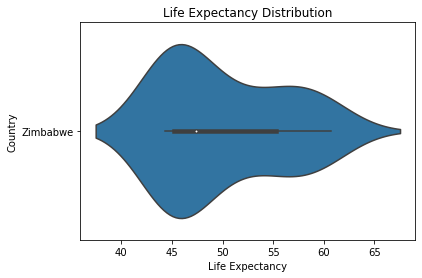

In [14]:
zim_df = df[df.Country == 'Zimbabwe']
sns.violinplot(data=zim_df, x='LE', y='Country')
plt.xlabel('Life Expectancy')
plt.title('Life Expectancy Distribution')

## Conclusions
Through the creation of visualisations, answers were found for the questions identified at the beginning of the project:
- Has life expectancy increased over time in the six nations?
 - Yes, all countries showed an increase in life expectancy.
- Has GDP increased over time in the six nations?
 - Yes, all countries showed an increase in GDP.
- Is there a correlation between GDP and life expectancy of a country?
 - Yes, there is positive correlation between GDP and life expectancy.
- What is the average life expectancy in these nations?
 - The average life expectancy for Chile, China, Germany, Mexico, and the United States was between 74 and 80 years, while the average life expectancy for Zimbabwe was about 50 years.
- What is the distribution of that life expectancy?
 - Most countries showed a left skewed distribution, except Zimbabwe which showed a right skewed distribution.

## Moving Forward
This report only investigated 15 years of data. It would be interesting to look at a larger dataset. Additionally, the data ends with the year 2015. An additional 5 years of data are now available for analyzation.